In [1]:
import pandas as pd

# Load the dataset
ipl_data = pd.read_csv('matches.csv')

# Examine the first few rows
print(ipl_data.head())

# Get an overview of the dataset
print(ipl_data.info())

# Get statistical summary
print(ipl_data.describe())


       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [2]:
# Count matches at each venue
venue_counts = ipl_data['venue'].value_counts()

# Convert the results into a DataFrame
venue_counts_df = venue_counts.reset_index()
venue_counts_df.columns = ['Venue', 'Match Count']

print(venue_counts_df)


                                                Venue  Match Count
0                                        Eden Gardens           77
1                                    Wankhede Stadium           73
2                               M Chinnaswamy Stadium           65
3                                    Feroz Shah Kotla           60
4           Rajiv Gandhi International Stadium, Uppal           49
5                     MA Chidambaram Stadium, Chepauk           48
6                              Sawai Mansingh Stadium           47
7                 Dubai International Cricket Stadium           46
8                            Wankhede Stadium, Mumbai           45
9          Punjab Cricket Association Stadium, Mohali           35
10                               Sheikh Zayed Stadium           29
11                            Sharjah Cricket Stadium           28
12           MA Chidambaram Stadium, Chepauk, Chennai           28
13                   Narendra Modi Stadium, Ahmedabad         

In [3]:
# Top 5 popular venues
popular_venues = venue_counts_df.head(5)
print("Top 5 Popular Venues:")
print(popular_venues)

# Analyze match outcomes
outcomes = ipl_data['result'].value_counts()
print("Match Outcomes:")
print(outcomes)


Top 5 Popular Venues:
                                       Venue  Match Count
0                               Eden Gardens           77
1                           Wankhede Stadium           73
2                      M Chinnaswamy Stadium           65
3                           Feroz Shah Kotla           60
4  Rajiv Gandhi International Stadium, Uppal           49
Match Outcomes:
wickets      578
runs         498
tie           14
no result      5
Name: result, dtype: int64


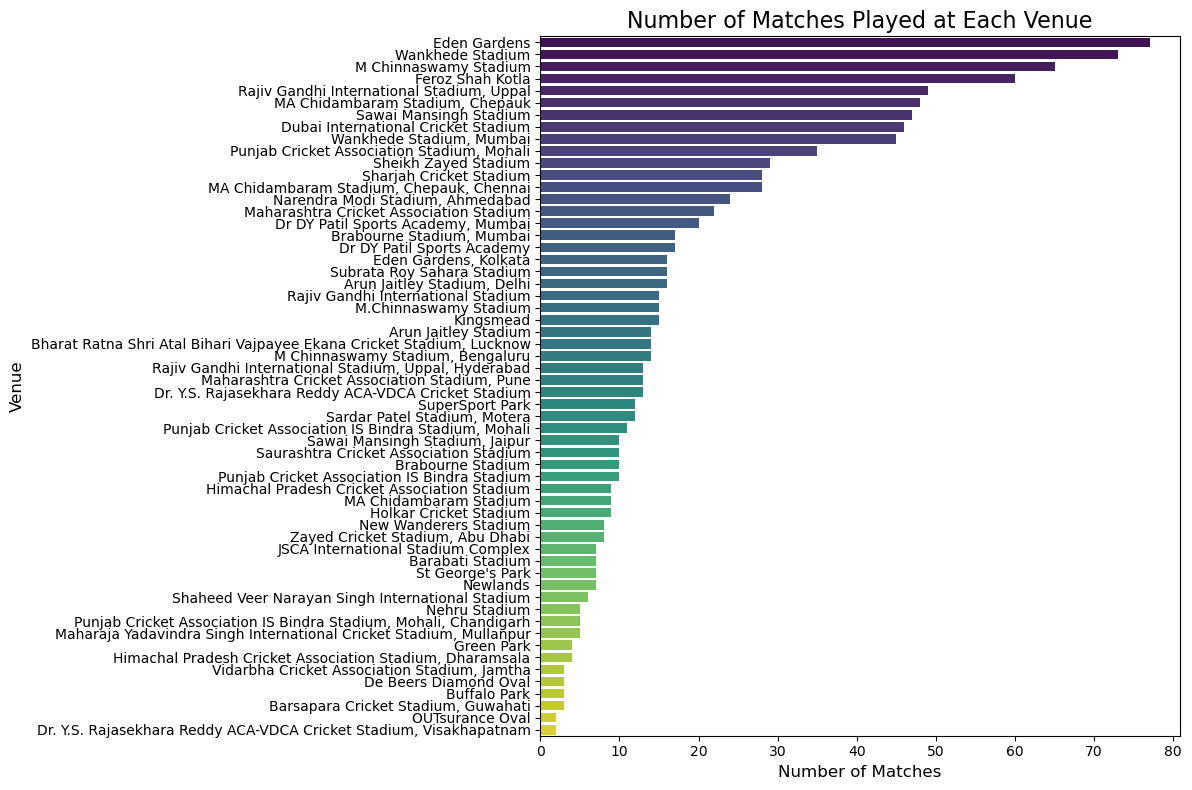

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=venue_counts_df, x='Match Count', y='Venue', palette='viridis')
plt.title('Number of Matches Played at Each Venue', fontsize=16)
plt.xlabel('Number of Matches', fontsize=12)
plt.ylabel('Venue', fontsize=12)
plt.tight_layout()
plt.show()


In [7]:
import folium

print("Folium is successfully installed!")


Folium is successfully installed!


In [10]:
import folium

# Coordinates of IPL venues
venue_coords = {
    "M Chinnaswamy Stadium": [12.9788, 77.5995],
    "Wankhede Stadium": [18.9388, 72.8258],
    "Eden Gardens": [22.5646, 88.3433],
}

# Matches played at each venue
venue_counts = {
    "M Chinnaswamy Stadium": 40,
    "Wankhede Stadium": 35,
    "Eden Gardens": 50,
}

# Create the map
map_venues = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add venue markers
for venue, coords in venue_coords.items():
    match_count = venue_counts.get(venue, 0)
    popup_info = f"{venue}: {match_count} matches"
    folium.Marker(location=coords, popup=popup_info).add_to(map_venues)

# Save the map to an HTML file
map_venues.save('venue_map.html')
print("Map saved as venue_map.html")


Map saved as venue_map.html


In [11]:
import webbrowser

# Open the map file in the default web browser
webbrowser.open('venue_map.html')


True